<a href="https://colab.research.google.com/github/LucasSSales/Lista03-Visao-Computacional/blob/main/VC_Lista_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# to run in google colab
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call('pip install opencv-python==3.4.2.16'.split())
    subprocess.call('pip install opencv-contrib-python==3.4.2.16'.split())

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.pyplot import figure
from sklearn.preprocessing import normalize

# QUESTÃO 01

In [ ]:
#PEGANDO OS PARES DE IMAGENS

# PANORAMA 01
maki = cv.cvtColor(cv.imread('maki.jpg'), cv.COLOR_BGR2RGB)
maki_l = maki[0:, 0:1200]
maki_r = maki[100:1000, 800:]

# PANORAMA 02
decade = cv.cvtColor(cv.imread('decade.jpg'), cv.COLOR_BGR2RGB)
decade1, decade2 = decade[0:, 0:450], cv.rotate(decade[0:, 200:], cv.ROTATE_90_CLOCKWISE)

# PANORAMA 03
left1 = cv.cvtColor(cv.imread('left1.jpg'), cv.COLOR_BGR2RGB)
right1 = cv.cvtColor(cv.imread('right1.jpg'), cv.COLOR_BGR2RGB)

# PANORAMA 04
left2= cv.cvtColor(cv.imread('left2.jpg'), cv.COLOR_BGR2RGB)
right2 = cv.cvtColor(cv.imread('right2.jpg'), cv.COLOR_BGR2RGB)

# PANORAMA 05
left3= cv.cvtColor(cv.imread('left3.jpg'), cv.COLOR_BGR2RGB)
right3 = cv.cvtColor(cv.imread('right3.jpg'), cv.COLOR_BGR2RGB)[:,100:]

In [ ]:
def detect_match_warp(img1, img2, percent=0.75):
  # usando sift para detecção de features e gerar os descritores
  sift = cv.xfeatures2d.SIFT_create()
  # imagem de base
  kp1, des1 = sift.detectAndCompute(img1,None)
  # imagem que será deformada
  kp2, des2 = sift.detectAndCompute(img2,None)
  # Usando Brute Force com KNN
  bf = cv.BFMatcher()
  matches = bf.knnMatch(des2,des1,k=2)
  good = []
  for m,n in matches:
      if m.distance < percent*n.distance:
          good.append([m])
  match = cv.drawMatchesKnn(img2,kp2,img1,kp1,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  # realizando o warp da imagem
  src_pts = np.float32([ kp2[m[0].queryIdx].pt for m in good ]).reshape(-1,1,2)
  dst_pts = np.float32([ kp1[m[0].trainIdx].pt for m in good ]).reshape(-1,1,2)
  M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC)
  #warp = cv.warpPerspective(img2, M, (img1.shape[1]+img2.shape[1], img1.shape[0]+img2.shape[0]))
  warp = cv.warpPerspective(img2, M, (img1.shape[1]+img2.shape[1], img1.shape[0]))
  #plots
  figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
  plt.imshow(match),plt.show()
  figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
  plt.imshow(warp),plt.show()
  # retornando o warp e os pontos bons
  return match, warp

def plot_question_imgs(img1, img2):
  plt.subplot(121),plt.imshow(img1),plt.title('Base')
  plt.xticks([]), plt.yticks([])

  plt.subplot(122),plt.imshow(img2),plt.title('A ser deformada')
  plt.xticks([]), plt.yticks([])

  plt.show()

def fusion(to_add, warped):
  for i in range(len(to_add)):
    for j in range(len(to_add[i])):
      if (np.sum(warped[i][j])==0): 
        warped[i][j] = to_add[i][j]

  figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
  plt.imshow(warped),plt.show()

### PANORAMA 01

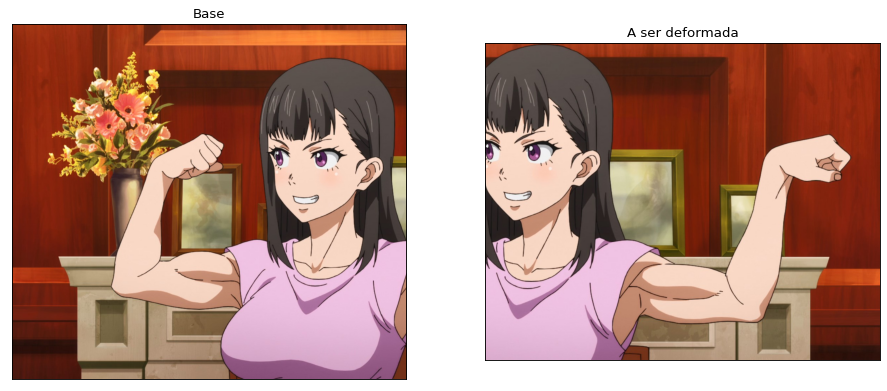

In [ ]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plot_question_imgs(maki_l, maki_r)

<Figure size 800x800 with 0 Axes>

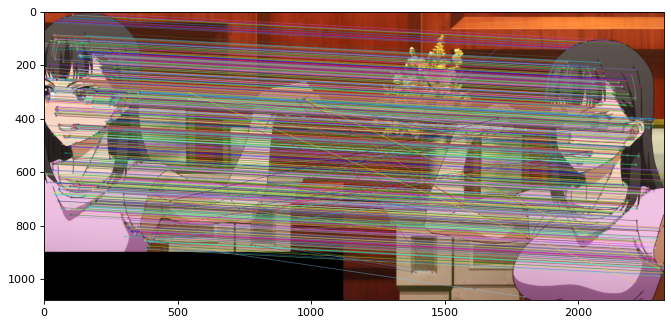

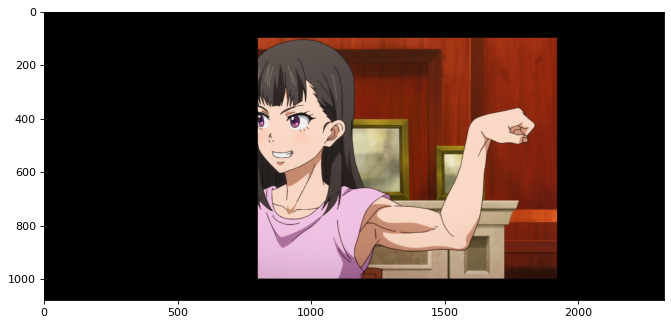

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match_maki, warp_maki = detect_match_warp(maki_l, maki_r)

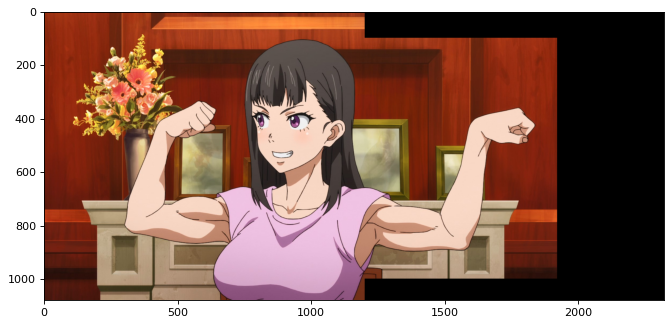

In [ ]:
fusion(maki_l, warp_maki)

### PANORAMA 02

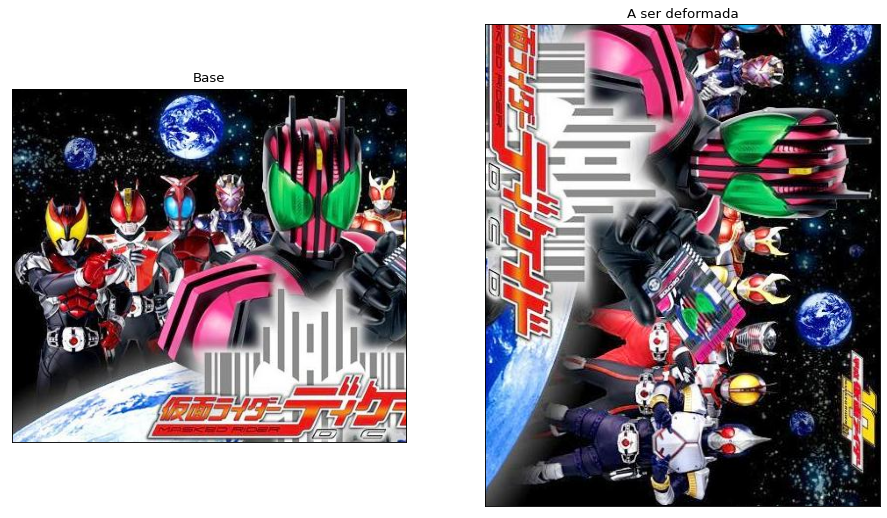

In [ ]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plot_question_imgs(decade1, decade2)

<Figure size 800x800 with 0 Axes>

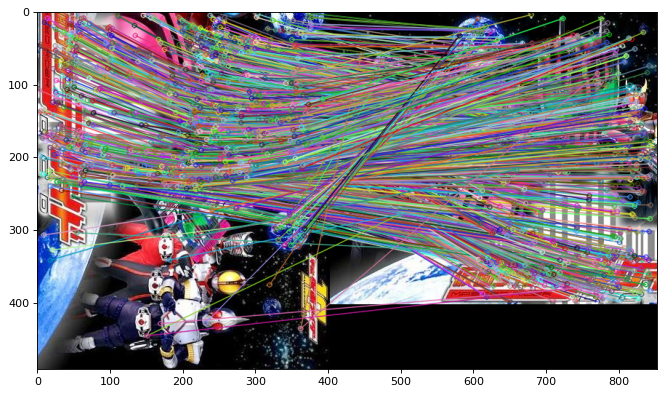

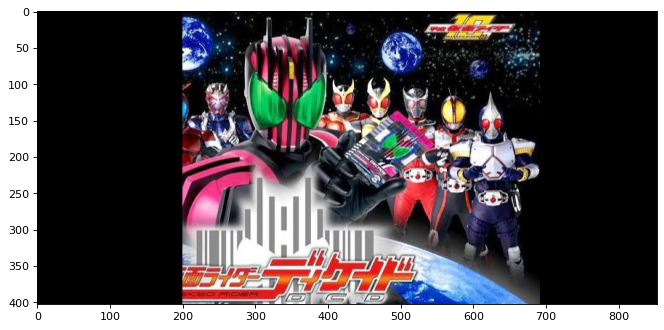

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match_decade, warp_decade = detect_match_warp(decade1, decade2)

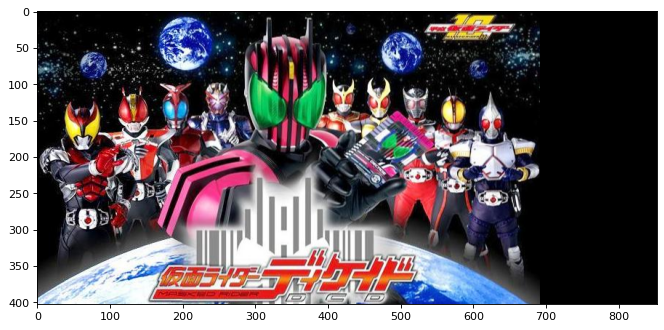

In [ ]:
fusion(decade1, warp_decade)

### PANORAMA 03

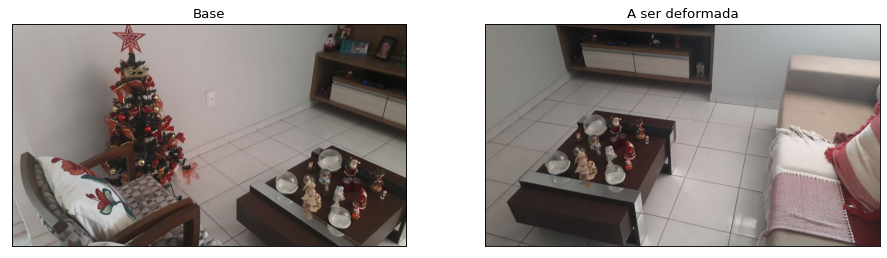

In [ ]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plot_question_imgs(left1, right1)

<Figure size 800x800 with 0 Axes>

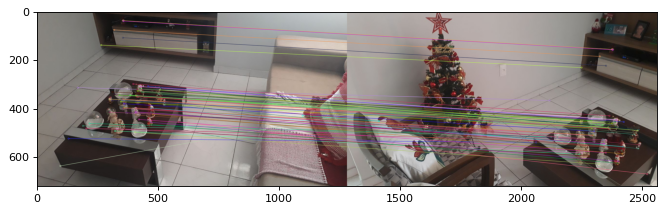

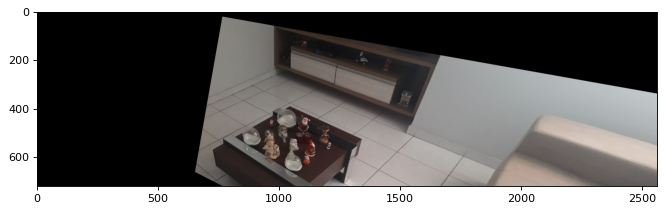

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match01, warp01 = detect_match_warp(left1, right1, percent=0.5)

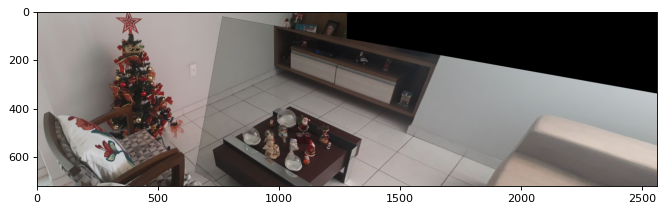

In [ ]:
fusion(left1, warp01)

### PANORAMA 04

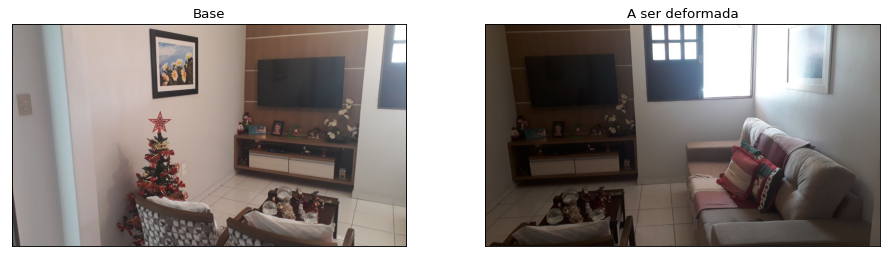

In [ ]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plot_question_imgs(left2, right2)

<Figure size 800x800 with 0 Axes>

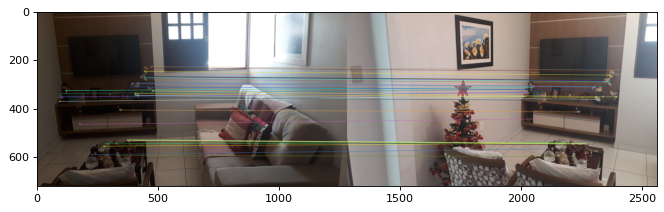

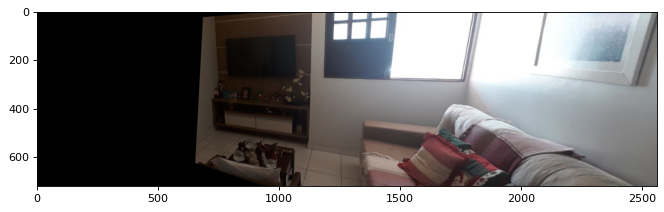

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match02, warp02 = detect_match_warp(left2, right2, percent=0.4)

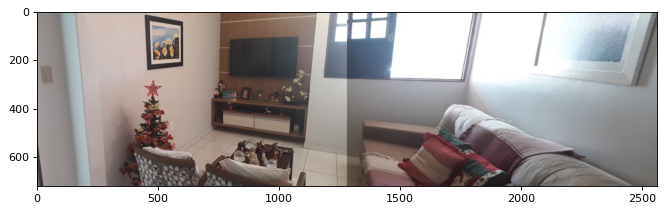

(<matplotlib.image.AxesImage at 0x7fed28f116d8>, None)

In [ ]:
for i in range(len(left2)):
  for j in range(len(left2[i])):
    #if (np.sum(warp02[i][j])==0): 
    warp02[i][j] = left2[i][j]

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(warp02),plt.show()
#fusion(left2, warp02)

### PANORAMA 05

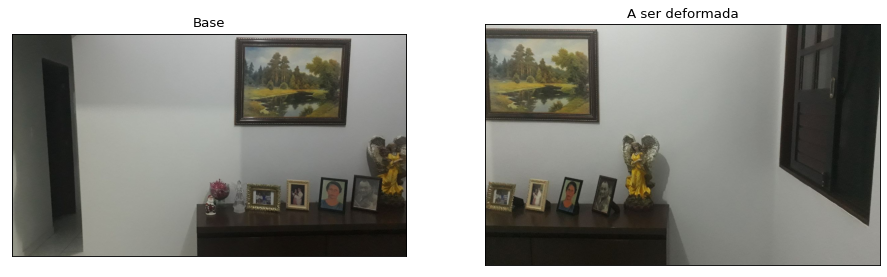

In [ ]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plot_question_imgs(left3, right3)

<Figure size 800x800 with 0 Axes>

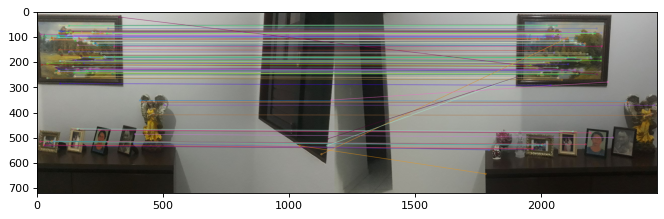

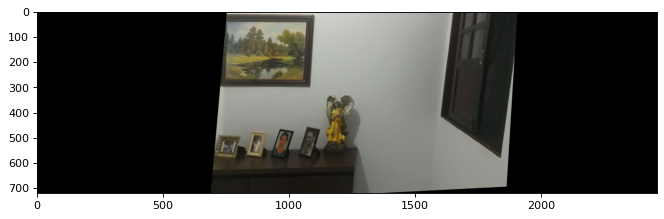

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match03, warp03 = detect_match_warp(left3, right3, percent=0.7)
#oinversa np.linalg.inv

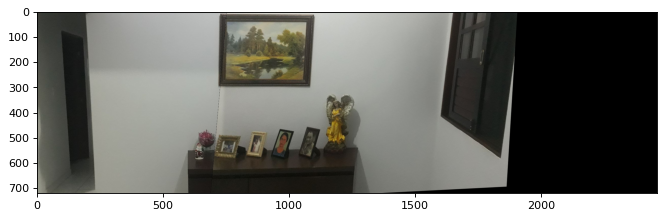

In [ ]:
fusion(left3, warp03)

# QUESTÃO 02

In [ ]:
p01 = cv.cvtColor(cv.imread('pan01-1.jpg'), cv.COLOR_BGR2RGB)
p02 = cv.cvtColor(cv.imread('pan01-2.jpg'), cv.COLOR_BGR2RGB)
p03 = cv.cvtColor(cv.imread('pan01-3.jpg'), cv.COLOR_BGR2RGB)

In [4]:
def detect_match_warp_2(img1, img2, percent=0.75, base='l'):

  # transladando as imgs do meio/direita de base para o warp nao apagar os pixels q saem da janela
  shape_w, t = (img1.shape[1]+img2.shape[1], img1.shape[0]), np.identity(3)
  id = np.identity(3)
  if (base == 'r'):
    id[0][2] = img2.shape[1]
    img1 = cv.warpPerspective(img1, id, shape_w)
    print(img1.shape)

  # usando sift para detecção de features e gerar os descritores
  sift = cv.xfeatures2d.SIFT_create()
  # imagem de base
  kp1, des1 = sift.detectAndCompute(img1,None)
  # imagem que será deformada
  kp2, des2 = sift.detectAndCompute(img2,None)
  # Usando Brute Force com KNN
  bf = cv.BFMatcher()
  matches = bf.knnMatch(des2,des1,k=2)
  good = []
  for m,n in matches:
      if m.distance < percent*n.distance:
          good.append([m])
  match = cv.drawMatchesKnn(img2,kp2,img1,kp1,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

  # realizando o warp da imagem
  src_pts = np.float32([ kp2[m[0].queryIdx].pt for m in good ]).reshape(-1,1,2)
  dst_pts = np.float32([ kp1[m[0].trainIdx].pt for m in good ]).reshape(-1,1,2)
  M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC)
  warp = cv.warpPerspective(img2, M, shape_w)

  #plots
  figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
  plt.imshow(match),plt.show()
  figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
  plt.imshow(warp),plt.show()

  return M, warp, t

def fusion(to_add, warped):
  for i in range(len(to_add)):
    for j in range(len(to_add[i])):
      if (np.sum(warped[i][j])==0): 
        warped[i][j] = to_add[i][j]

  figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
  plt.imshow(warped),plt.show()
  return warped


def is_out(M, shape):
  print(shape)
  p1 = np.dot(M, [0, 0, 1])
  if (p1[0] < 0 or p1[1] < 0): return True
  p2 = np.dot(M, [0, shape[0], 1])
  if (p2[0] < 0 or p2[1] < 0): return True
  p3 = np.dot(M, [shape[1], 0, 1])
  if (p3[0] < 0 or p3[1] < 0): return True
  p4 = np.dot(M, [shape[0], shape[1], 1])
  if (p4[0] < 0 or p4[1] < 0): return True
  return False

def transl_base(base, other):
  shape = (base.shape[1]+other.shape[1], base.shape[0]) #usa a img d base p altura

  #matriz de translação
  id = np.identity(3)
  id[0][2] = other.shape[1]

  tb = cv.warpPerspective(base, id, shape) #passa a base p transladar

  return tb

In [1]:
def question02(img1, img2, img3):
  # usando img1 de base
  M1_1, w1_1, t1_1 = detect_match_warp_2(img1, img2)
  fusion1 = fusion(img1, w1_1)

  M1_2, w1_2, t1_2 = detect_match_warp_2(fusion1, img3)
  fusion1 = fusion(fusion1, w1_2)

  # usando img2 de base
  M2_1, w2_1, t2_1 = detect_match_warp_2(img2, img1, base='r')
  base2_1 = transl_base(img2, img1)
  fusion2 = fusion(base2_1, w2_1)

  M2_2, w2_2, t2_2 = detect_match_warp_2(fusion2, img3)
  fusion2 = fusion(fusion2, w2_2)

  # usando img3 de base
  M3_1, w3_1, t3_1 = detect_match_warp_2(img3, img2, base='r')
  base3_1 = transl_base(img3, img2)
  fusion3 = fusion(base3_1, w3_1)

  M3_2, w3_2, t3_2 = detect_match_warp_2(fusion3, img1, base='r')
  base3_2 = transl_base(fusion3, img1)
  fusion3 = fusion(base3_2, w3_2)

In [5]:
def plot_question2_imgs(img1, img2, img3):
  plt.subplot(131),plt.imshow(img1),plt.title('Esquerda')
  plt.xticks([]), plt.yticks([])

  plt.subplot(132),plt.imshow(img2),plt.title('Meio')
  plt.xticks([]), plt.yticks([])

  plt.subplot(133),plt.imshow(img3),plt.title('Direita')
  plt.xticks([]), plt.yticks([])

  plt.show()

### PANORAMA 01

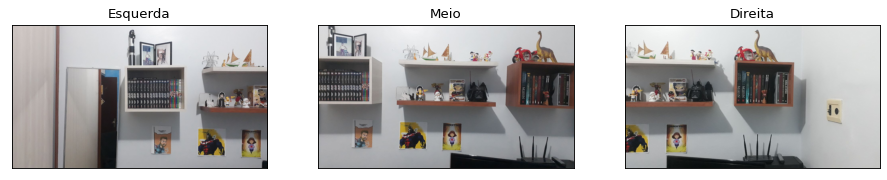

In [ ]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plot_question2_imgs(p01, p02, p03)

#### Base: esquerda

<Figure size 800x800 with 0 Axes>

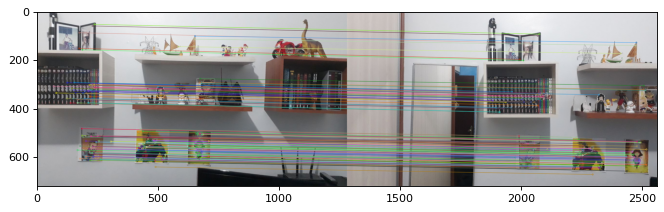

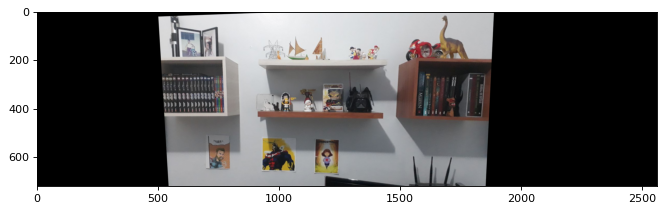

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match01, warp01 = detect_match_warp(p01, p02, percent=0.4)

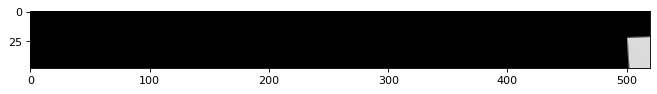

(<matplotlib.image.AxesImage at 0x7fed20edd2b0>, None)

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(warp01[0:48, 0:520]),plt.show()

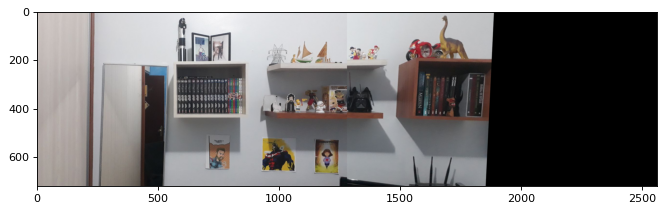

(<matplotlib.image.AxesImage at 0x7fed28d718d0>, None)

In [ ]:
for i in range(len(p01)):
  for j in range(len(p01[i])):
    warp01[i][j] = p01[i][j]

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(warp01),plt.show()

<Figure size 800x800 with 0 Axes>

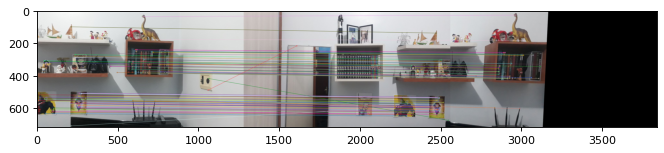

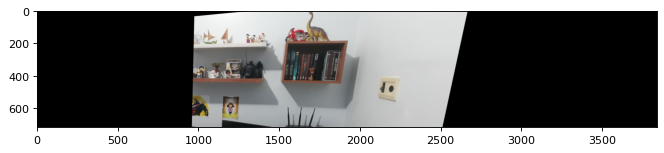

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match02, warp02 = detect_match_warp(warp01, p03, percent=0.5)

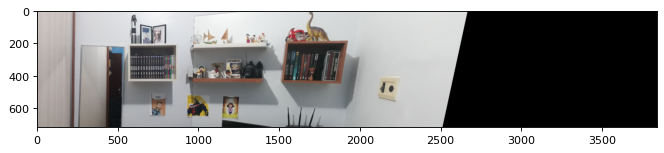

(<matplotlib.image.AxesImage at 0x7fed290d9898>, None)

In [ ]:
for i in range(len(warp01)):
  for j in range(len(warp01[i])):
    if (np.sum(warp02[i][j]) == 0 and np.sum(warp01[i][j]) != 0): warp02[i][j] = warp01[i][j]

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(warp02),plt.show()

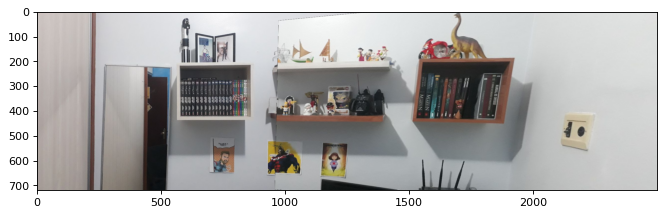

(<matplotlib.image.AxesImage at 0x7fed28c60dd8>, None)

In [ ]:
final = np.zeros((720, 2500, 3), np.uint8)
#warp02.shape
for i in range(len(final)):
  for j in range(len(final[i])):
    final[i][j] = warp02[i][j]

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(final),plt.show()

#### Base: Meio

<Figure size 800x800 with 0 Axes>

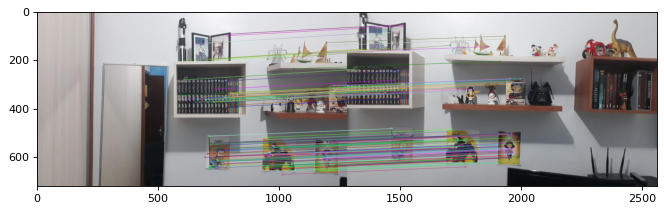

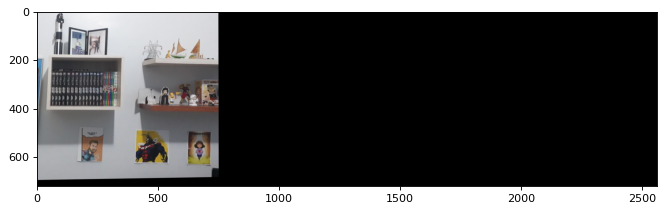

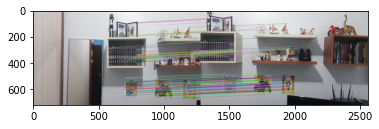

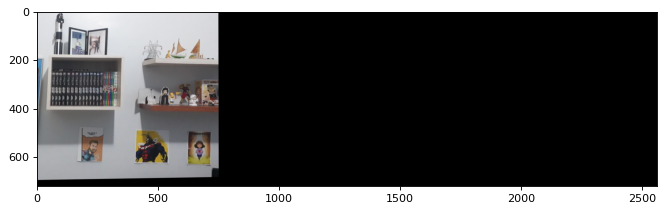

(<matplotlib.image.AxesImage at 0x7fed20c0ce10>, None)

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match01, warp01 = detect_match_warp(p02, p01, percent=0.5)
plt.imshow(match01),plt.show()
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(warp01),plt.show()

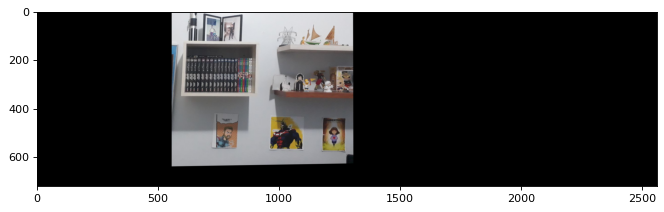

(<matplotlib.image.AxesImage at 0x7fed20f51cf8>, None)

In [ ]:
t = np.zeros((3,3))
t[0][0] = 1
t[1][1] = 1
t[2][2] = 1
t[0][2] = 556
t[1][2] = 56
w1 = cv.warpPerspective(warp01, t, (warp01.shape[1], warp01.shape[0]))
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(w1),plt.show()

<Figure size 800x800 with 0 Axes>

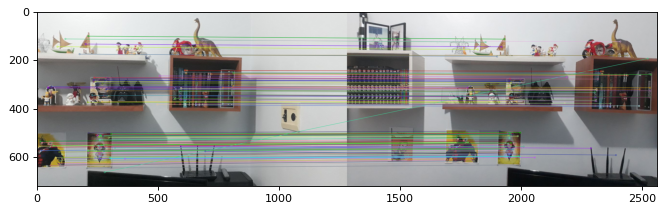

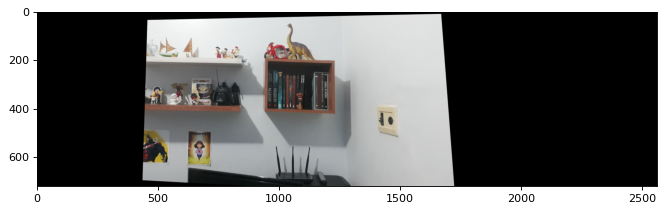

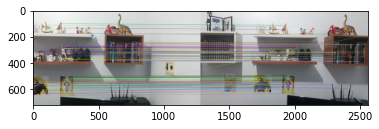

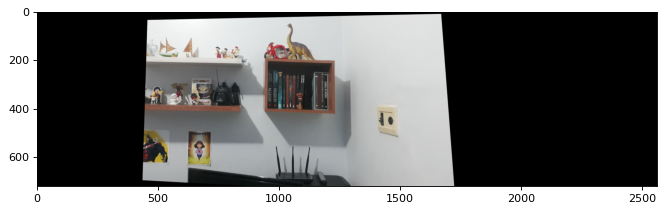

(<matplotlib.image.AxesImage at 0x7fed2ade1898>, None)

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match02, warp02 = detect_match_warp(p02, p03, percent=0.5)
plt.imshow(match02),plt.show()
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(warp02),plt.show()

<Figure size 800x800 with 0 Axes>

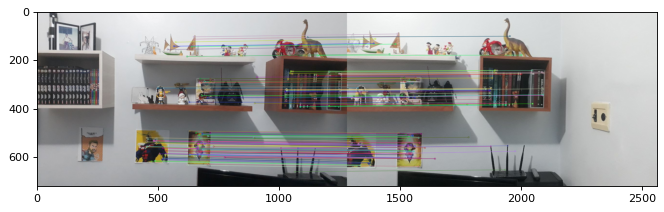

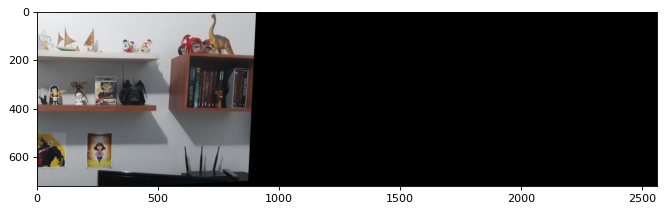

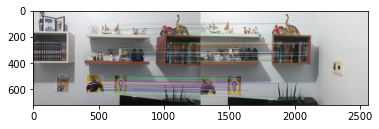

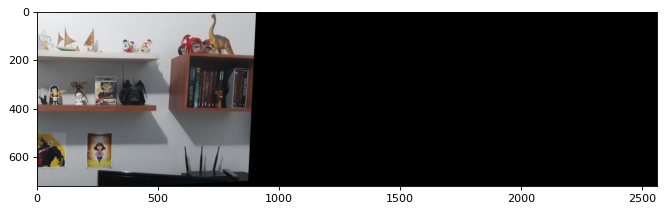

(<matplotlib.image.AxesImage at 0x7fed28ec6198>, None)

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match01, warp01 = detect_match_warp(p03, p02, percent=0.5)
plt.imshow(match01),plt.show()
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(warp01),plt.show()

<Figure size 800x800 with 0 Axes>

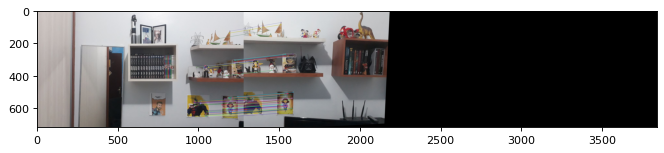

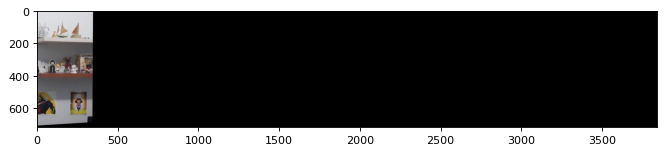

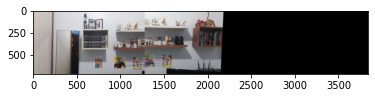

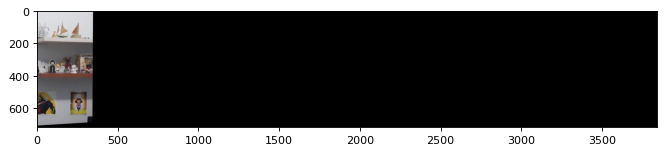

(<matplotlib.image.AxesImage at 0x7fed2add6860>, None)

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match02, warp02 = detect_match_warp(warp01, p01, percent=0.5)
plt.imshow(match02),plt.show()
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(warp02),plt.show()

### PANORAMA 02

### PANORAMA 03

### PANORAMA 04

### PANORAMA 05

# QUESTÃO 03

Essa questão foi resolvida em um arquivo .py separado no repositorio, devido a facilidade em fazer a webcam rodar com os codigos em python do opencv fora do colab, junto com o video gerado, o arquivo "output.avi" e a print da tela logo abaixo, os valores expostos são os itens finais dos vetores de rotação e translação

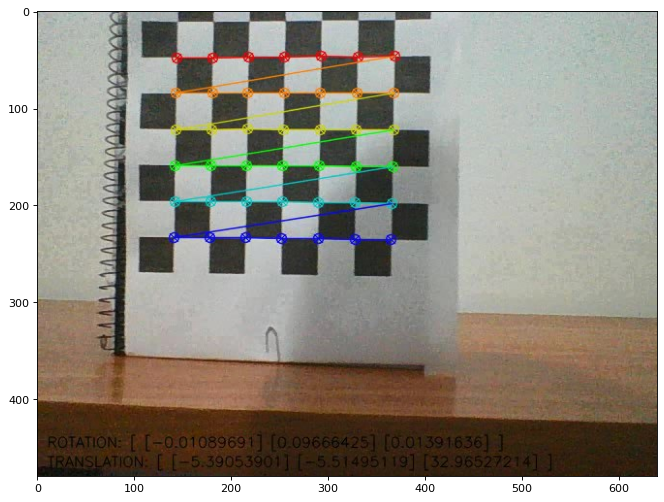

(<matplotlib.image.AxesImage at 0x7fed28e045f8>, None)

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(cv.cvtColor(cv.imread('q03 - print.jpg'), cv.COLOR_BGR2RGB)),plt.show()

# QUESTÃO 04

O processo de calibração de câmera no opencv depende do cálculo de 2 matrizes: a de distorções e a da câmera. A matriz de distorções leva em conta dois tipos de ditorção, a radial e a tangencial, dependendo do tipo de câmera, a radial causa o efeito conhecido "como olho de peixe", já a tangencial, que ocorre devido aos planos da câmera e da imagem não estarem paralelos, seus cálculos podem nos retornar valores para a matriz de distorção [ k1 k2 p1 p2 k3 ]. A matriz da cãmera leva em conta os valores da distância focal em x e y, que geralmente podem ser assumidos iguais, e o centro ótico da camera, assim resultando na matriz [[fx 0 cx], [0, fy cy], [0, 0, 1]].

Para realizar os cálculos geométricos necessários, o opencv tem suporte a 3 métodos de calibração com objetos: tabuleiro de xadrez preto e branco, que busca os *corners* entre os limites de um quadrado preto e outro branco, padrões de círculos simétrico e padrões de círculo assimétricos, ambos que buscam calcular a partir dos centros dos círculos.

O algoritmo utilizado pela função calibrateCamera() se inspira em ideias propostas por Jean-Yves Bouguet e Zhengyou Zhang, referenciados na bibliografia do framework, e segue os passos de: Computar os parâmetros iniciais intricecos ou lê-los caso sejam fornecidos como parâmteros, e coloca o valor 0 para os coeficientes de distorção, a menos que sejam especificado um valor para variável CALIB_FIX_K; Estimar a pose inicial da câmera como se os parâmetros intrisecos já forem conhecidos usando solvePnP; Executa a otimização global de Levenberg-Marquardt para minimizar o erro de reprojeção, usando a soma total do quadrado de todas as distancias entre os pontos de interesse observados da imagem e os projetados do objeto.